In [56]:
import pandas as pd
import numpy as np

In [57]:
data_path = "E:\\study\\第四年\\知识分析\\PCA\\pca\\iris.data.txt"
data = pd.read_table(data_path,header=None,names=['a','b','c','d','e'], sep=',')

In [58]:
feature = data.loc[:,['a','b','c','d']]

In [59]:
f1 = data.loc[0:50,['a','b','c','d']]
f2 = data.loc[50:100,['a','b','c','d']]
f3 = data.loc[100:150,['a','b','c','d']]

In [75]:
f1 = (np.matrix(f1)).T
f2 = (np.matrix(f2)).T
f3 = (np.matrix(f3)).T

In [60]:
featuremat = (np.matrix(feature)).T

In [61]:
for i in range(len(featuremat)):
    featuremat[i] -= featuremat[i].mean()

In [62]:
featuremat

matrix([[ -7.43333333e-01,  -9.43333333e-01,  -1.14333333e+00,
          -1.24333333e+00,  -8.43333333e-01,  -4.43333333e-01,
          -1.24333333e+00,  -8.43333333e-01,  -1.44333333e+00,
          -9.43333333e-01,  -4.43333333e-01,  -1.04333333e+00,
          -1.04333333e+00,  -1.54333333e+00,  -4.33333333e-02,
          -1.43333333e-01,  -4.43333333e-01,  -7.43333333e-01,
          -1.43333333e-01,  -7.43333333e-01,  -4.43333333e-01,
          -7.43333333e-01,  -1.24333333e+00,  -7.43333333e-01,
          -1.04333333e+00,  -8.43333333e-01,  -8.43333333e-01,
          -6.43333333e-01,  -6.43333333e-01,  -1.14333333e+00,
          -1.04333333e+00,  -4.43333333e-01,  -6.43333333e-01,
          -3.43333333e-01,  -9.43333333e-01,  -8.43333333e-01,
          -3.43333333e-01,  -9.43333333e-01,  -1.44333333e+00,
          -7.43333333e-01,  -8.43333333e-01,  -1.34333333e+00,
          -1.44333333e+00,  -8.43333333e-01,  -7.43333333e-01,
          -1.04333333e+00,  -7.43333333e-01,  -1.243333

In [63]:
Cov = 1/len(feature)*featuremat*featuremat.T

In [64]:
Cov

matrix([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
        [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
        [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
        [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

In [65]:
tz = np.linalg.eig(Cov)

In [66]:
tz[1][:]

matrix([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [67]:
def generateP(k,vecs):
    return np.matrix(vecs[0:k])

In [68]:
P = generateP(2,tz[1])

In [69]:
P

matrix([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435]])

In [79]:
Y1 = P*f1
Y2 = P*f2
Y3 = P*f3

In [87]:
x1 = (Y1[0].tolist())[0]
y1 = (Y1[1].tolist())[0]
x2 = (Y2[0].tolist())[0]
y2 = (Y2[1].tolist())[0]
x3 = (Y3[0].tolist())[0]
y3 = (Y3[1].tolist())[0]

In [90]:
y1

[-2.203398185463285,
 -1.8220882218215935,
 -2.0112187269022606,
 -1.8107369831927684,
 -2.2681425336067136,
 -2.4058572450637112,
 -2.121701938626325,
 -2.0625582505476032,
 -1.7079825397428363,
 -1.8030082149186362,
 -2.314379517902439,
 -1.98646266377535,
 -1.7814518975905749,
 -1.9192428790258986,
 -2.745126211638705,
 -2.914677715282246,
 -2.644424480238953,
 -2.2358076207050823,
 -2.325157239656929,
 -2.3950795233092212,
 -1.9761821889168685,
 -2.3545177214183686,
 -2.473802212825069,
 -1.9757585905419448,
 -1.8075372373939187,
 -1.711031493223194,
 -2.067735312237387,
 -2.1519832656586964,
 -2.1386538373198567,
 -1.8322933005208293,
 -1.7675489523774008,
 -2.1602846769880832,
 -2.5574012532127974,
 -2.74710440134872,
 -1.8030082149186362,
 -2.0955412026637354,
 -2.2959475502139814,
 -1.8030082149186362,
 -1.8405955856692964,
 -2.070785139536825,
 -2.287222540509671,
 -1.3704332499717662,
 -1.986538059934596,
 -2.2055254198536307,
 -2.188921723375776,
 -1.8462707680741692,
 -2.30

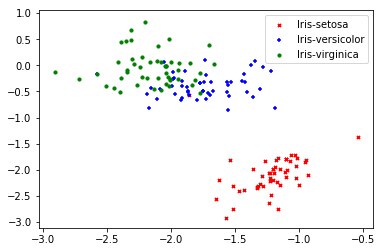

In [95]:
import matplotlib.pyplot as plt
plt.scatter(x1, y1, marker = 'x', color = 'red', s = 10, label = 'Iris-setosa')
plt.scatter(x2, y2, marker = '+', color = 'blue', s = 10, label = 'Iris-versicolor')
plt.scatter(x3, y3, marker = 'o', color = 'green', s = 10, label = 'Iris-virginica')
plt.legend(loc = 'best')
plt.show()

In [54]:
from numpy import *
def pca():
    a = (input()).split(' ')
    data = []
    m = int(a[0])
    n = int(a[1])
    k = int(a[2])
    #print(m,n,k)
    for i in range(m):
        line = (input()).split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        data.append(line)
    feature = data
    featuremat = transpose(feature)
    #print(featuremat)
    #零均值化
    for i in range(len(featuremat)):
        featuremat[i] -= mean(featuremat[i])
    Cov = cov(featuremat)
    tz = linalg.eig(Cov)
    p = ((tz[1].T)[0:k]).T
    s = ""
    for i in range(k):
        s = s + str(tz[0][i]) + " "
    print(s)
    for i in range(n):
        s = ""
        for j in range(k):
            s = s + str(p[i][j]) + " "
        print(s)
    
    shuchu3 = dot(transpose(featuremat),p)
    for i in range(m):
        s = ""
        for j in range(k):
            s = s + str(shuchu3[i][j]) + " "
        print(s)
    
def transpose(matrix):
        new_matrix = []
        for i in range(len(matrix[0])):
            matrix1 = []
            for j in range(len(matrix)):
                matrix1.append(matrix[j][i])
            new_matrix.append(matrix1)
        return new_matrix


In [53]:
pca()

4 3 2
2,0,-1.4
2.2,0.2,1.5
2.4,0.1,-1
1.9,0,-1.2
0.0456720937022 
0.0522743987378 0.982401884141 
0.0644998546923 0.17586430529 
0.996547618522 -0.0629148961714 
-0.883350955151 -0.0809395242645 
2.02999198925 -0.0317394852752 
-0.457372162778 0.304441701453 
-0.68926887132 -0.191762691913 


In [34]:
a = [1,2,3]


NameError: name 'inverse' is not defined